<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_10___Convnet_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualizing Intermediate activations

In [2]:
from keras.models import load_model

In [3]:
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip -qq '/content/gdrive/MyDrive/cats_and_dogs_small.zip'

In [6]:
img_path = './cats_and_dogs_small/test/cats/cat.1700.jpg'

In [8]:
from keras.preprocessing import image 
import numpy as np

In [9]:
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor/= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


In [10]:
import matplotlib.pyplot as plt

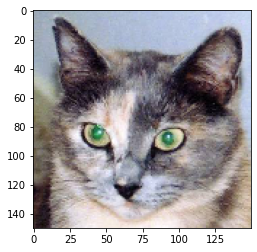

In [11]:
plt.imshow(img_tensor[0])
plt.show()

In [12]:
from keras import models

In [14]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)

In [15]:
activations = activation_model.predict(img_tensor)

In [16]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


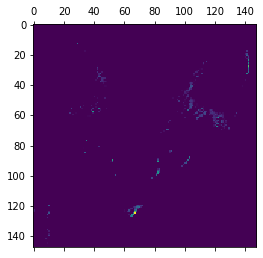

In [17]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 19], cmap = 'viridis')

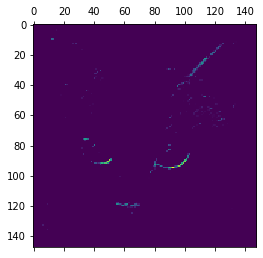

In [19]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

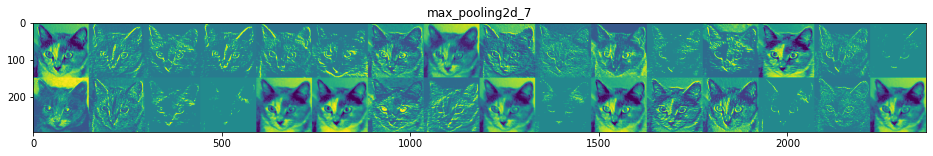

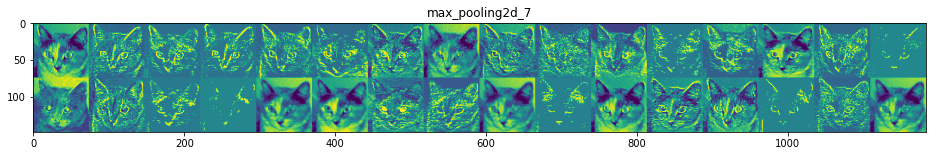

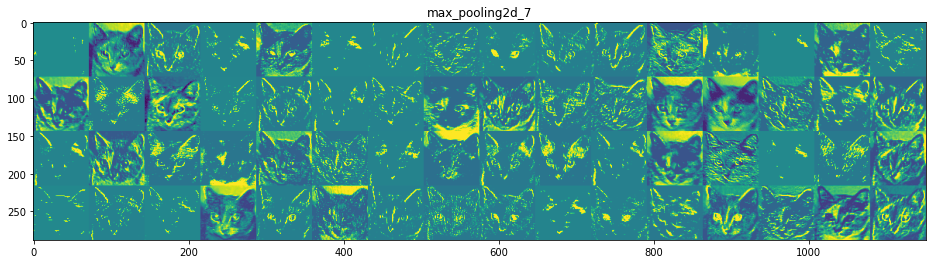

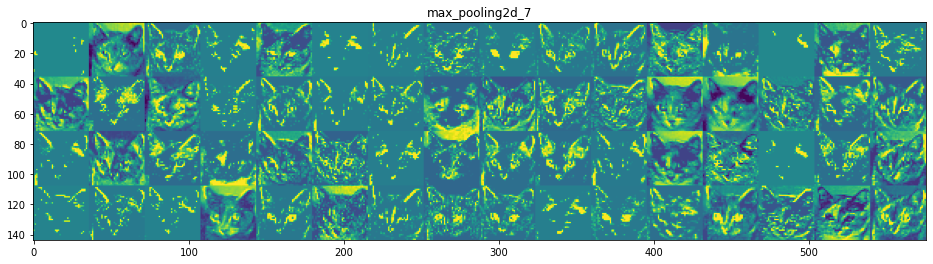

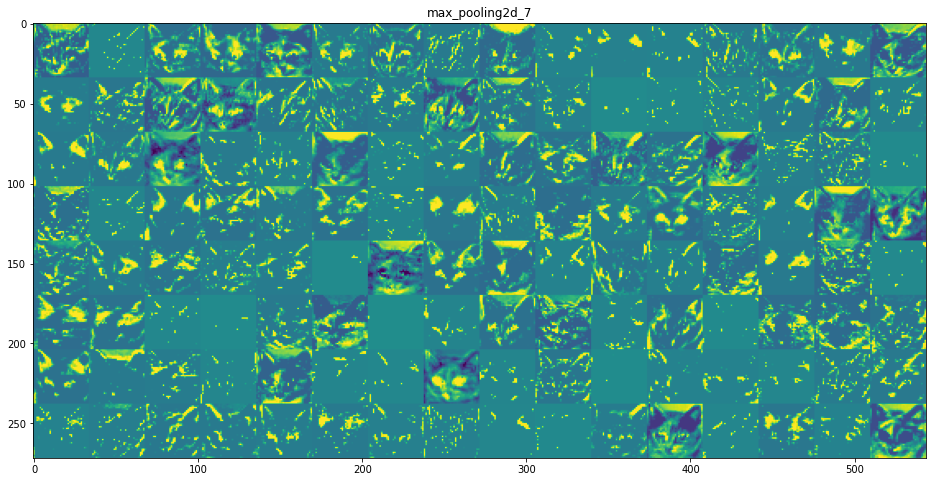

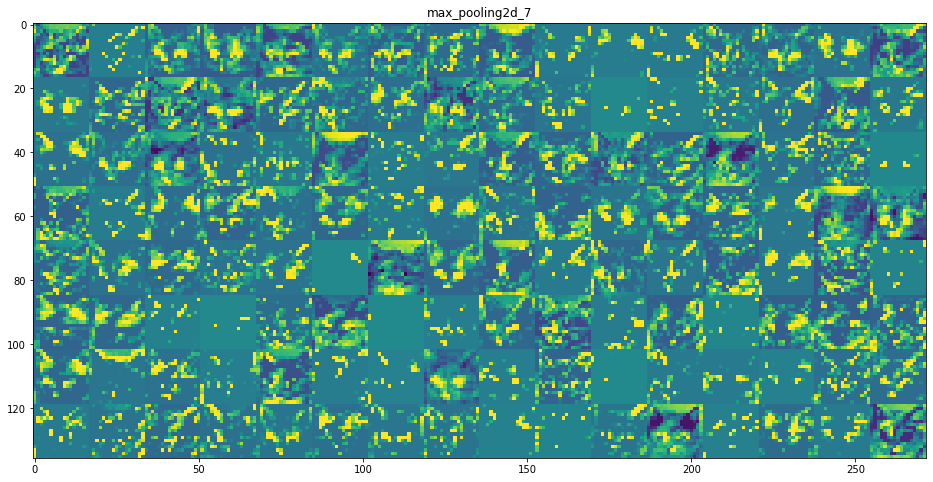

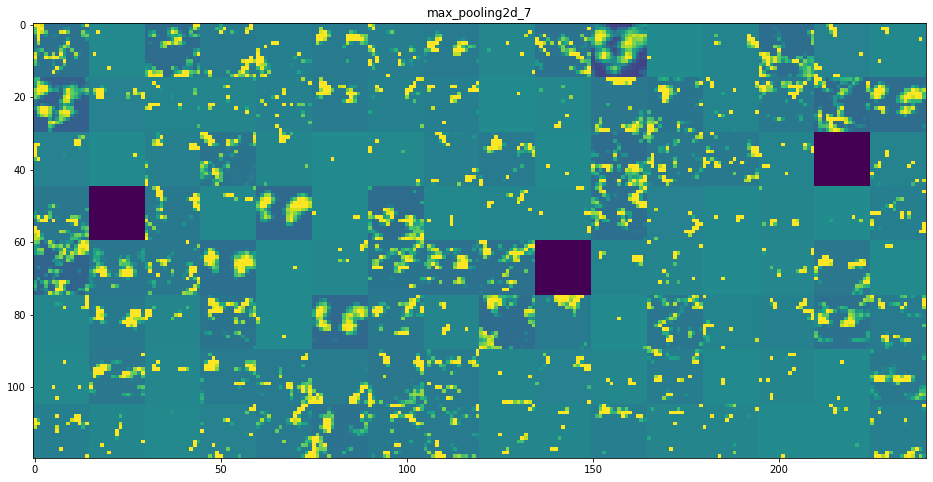

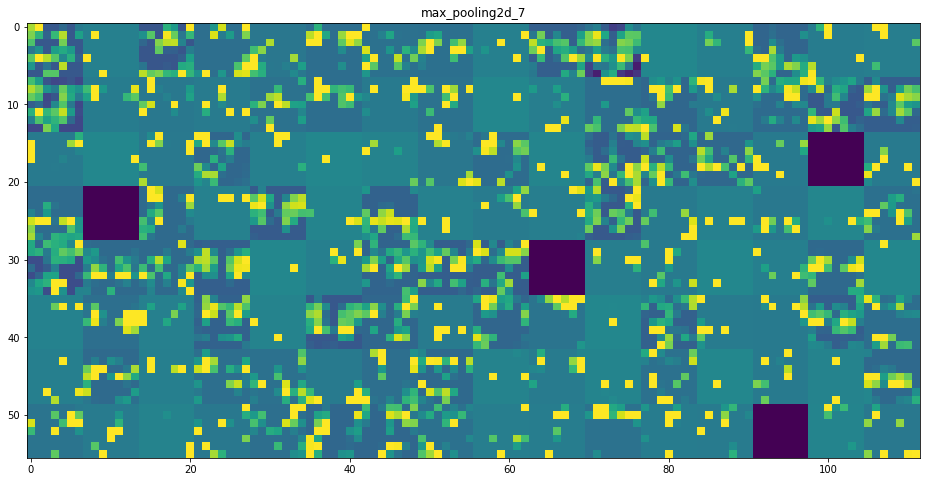

In [26]:
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]

      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(lay_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')